In [2]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 32.85 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (25001/25001), done.


In [3]:
valid_data_dir = '/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
img_size = 224
batch_size = 32

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5000 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation='relu',
                           input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [10]:
model.fit(train_generator,
          steps_per_epoch=train_generator.samples//batch_size, epochs=10,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//batch_size)

Epoch 1/10
625/625 [==============================] - 335s 522ms/step - loss: 0.6425 - accuracy: 0.6249 - val_loss: 0.5665 - val_accuracy: 0.7125
Epoch 2/10
625/625 [==============================] - 324s 519ms/step - loss: 0.5604 - accuracy: 0.7150 - val_loss: 0.5535 - val_accuracy: 0.7105
Epoch 3/10
625/625 [==============================] - 326s 522ms/step - loss: 0.5038 - accuracy: 0.7599 - val_loss: 0.4841 - val_accuracy: 0.7690
Epoch 4/10
625/625 [==============================] - 299s 477ms/step - loss: 0.4744 - accuracy: 0.7748 - val_loss: 0.4642 - val_accuracy: 0.7764
Epoch 5/10
625/625 [==============================] - 323s 517ms/step - loss: 0.4453 - accuracy: 0.7943 - val_loss: 0.4204 - val_accuracy: 0.8077
Epoch 6/10
625/625 [==============================] - 298s 477ms/step - loss: 0.4223 - accuracy: 0.8087 - val_loss: 0.4061 - val_accuracy: 0.8203
Epoch 7/10
625/625 [==============================] - 294s 470ms/step - loss: 0.3992 - accuracy: 0.8224 - val_loss: 0.4037 -

In [11]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [18]:
model = tf.keras.models.load_model('/content/model.h5')

In [26]:
def preprocess(img):
  img = cv2.resize(img, (224,224))
  img = img / 255.0
  img = np.expand_dims(img, axis=0)

  prediction = model.predict(img)
  if prediction[0] > 0.7:
    return('DOG')
  else:
    return('CAT')

In [31]:
img = cv2.imread('/content/cat.jpeg')

1/1 [==============================] - 0s 18ms/step


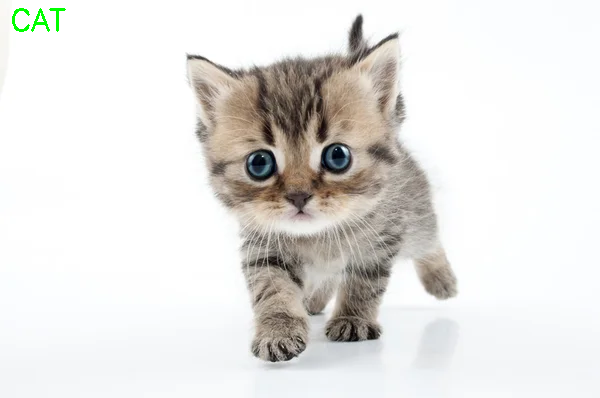

In [32]:
label = preprocess(img)
cv2.putText(img, label, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
img = cv2.imread('/content/dog-cat-full-dataset/data/test/dogs/dog.10435.jpg')

1/1 [==============================] - 0s 19ms/step


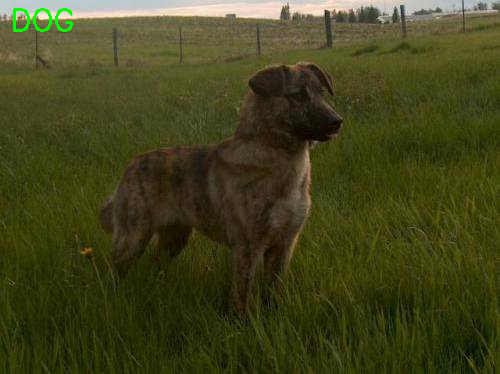

In [39]:
label = preprocess(img)
cv2.putText(img, label, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()